FOOD SALE DATA

"This dataset contains details about fast food sales.So,the dataset contains various information regarding customer transactions,
product details,purchasing method".

# libraries imported and dataset loaded

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv( "C:\Data science\DATA SET\Balaji Fast Food Sales.csv")
print(df.head())
print(df.info())
print(df.isna().sum())
print(df.tail())


   order_id        date        item_name  item_type  item_price  quantity  \
0         1  07-03-2022         Aalopuri   Fastfood          20        13   
1         2   8/23/2022          Vadapav   Fastfood          20        15   
2         3  11/20/2022          Vadapav   Fastfood          20         1   
3         4  02-03-2023  Sugarcane juice  Beverages          25         6   
4         5  10-02-2022  Sugarcane juice  Beverages          25         8   

   transaction_amount transaction_type received_by time_of_sale  
0                 260              NaN         Mr.        Night  
1                 300             Cash         Mr.    Afternoon  
2                  20             Cash         Mr.    Afternoon  
3                 150           Online         Mr.        Night  
4                 200           Online         Mr.      Evening  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null C

dropping null values from the data function using dropna

In [3]:
df.dropna(inplace=True)
print(df.isna().sum())

order_id              0
date                  0
item_name             0
item_type             0
item_price            0
quantity              0
transaction_amount    0
transaction_type      0
received_by           0
time_of_sale          0
dtype: int64


checking duplicate values using duplicated()

In [4]:
print(df.duplicated().sum())

0


checking datetime method using to_ datetime()..
using astype method


In [5]:
df["date"]=df['date'].astype('datetime64[s]')
df['date']=pd.to_datetime(df['date'])
print(df['date'])

1     2022-08-23
2     2022-11-20
3     2023-02-03
4     2022-10-02
5     2022-11-14
         ...    
991   2022-10-21
992   2022-07-17
993   2022-11-01
994   2022-06-18
999   2022-05-29
Name: date, Length: 893, dtype: datetime64[s]


finding outliers using boxplot in seaborn

([0, 1, 2, 3],
 [Text(0, 0, 'order_id'),
  Text(1, 0, 'item_price'),
  Text(2, 0, 'quantity'),
  Text(3, 0, 'transaction_amount')])

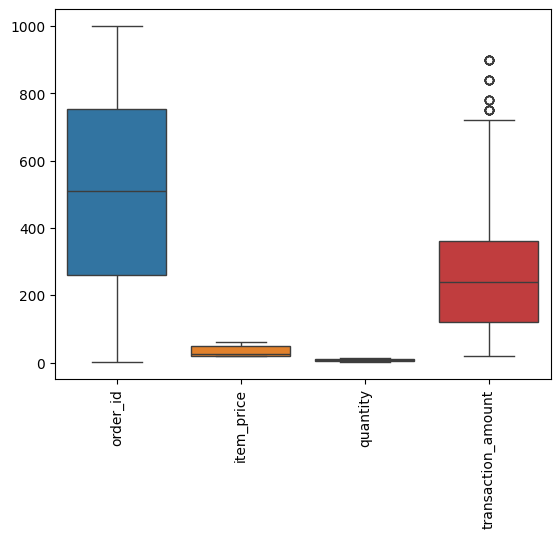

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=df)
plt.xticks(rotation=90)

In [6]:
df["z_score"]=(df['transaction_amount']-df['transaction_amount'].mean())/df['transaction_amount'].std()
#define threshold for identifying outliers
threshold=2
#remove rows where the absolute z-score is greater than the threshold
df_no_outliers=df[df['z_score'].abs()<=threshold]
#drop the z-score coloumn if its no longer needed
df=df_no_outliers.drop(columns=['z_score'])
#display the dataset without outliers
print(df)

     order_id        date        item_name  item_type  item_price  quantity  \
0           1  07-03-2022         Aalopuri   Fastfood          20        13   
1           2   8/23/2022          Vadapav   Fastfood          20        15   
2           3  11/20/2022          Vadapav   Fastfood          20         1   
3           4  02-03-2023  Sugarcane juice  Beverages          25         6   
4           5  10-02-2022  Sugarcane juice  Beverages          25         8   
..        ...         ...              ...        ...         ...       ...   
994       995   6/18/2022  Sugarcane juice  Beverages          25         1   
995       996   3/19/2023          Frankie   Fastfood          50        10   
996       997   9/20/2022         Sandwich   Fastfood          60         7   
998       999   8/27/2022         Panipuri   Fastfood          20         5   
999      1000   5/29/2022         Aalopuri   Fastfood          20         3   

     transaction_amount transaction_type received_b

([0, 1, 2, 3],
 [Text(0, 0, 'order_id'),
  Text(1, 0, 'item_price'),
  Text(2, 0, 'quantity'),
  Text(3, 0, 'transaction_amount')])

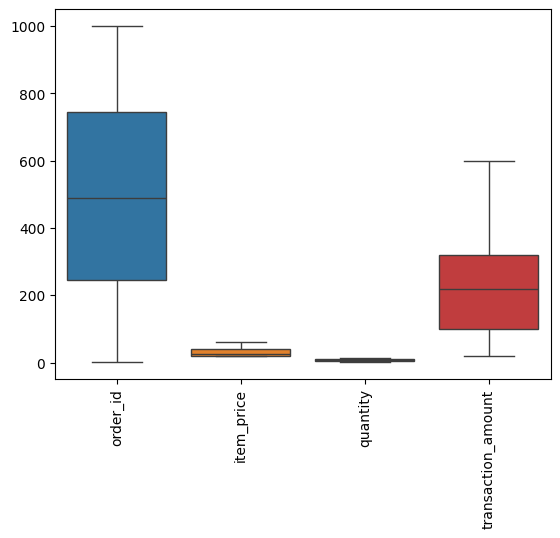

In [7]:
sns.boxplot(data=df)
plt.xticks(rotation=90)

statistical analysis.....

 :To check correlation 

In [ ]:

print(df.corr(numeric_only=True))


                    order_id  item_price  quantity  transaction_amount
order_id            1.000000    0.037028  0.010345            0.043970
item_price          0.037028    1.000000  0.050361            0.637238
quantity            0.010345    0.050361  1.000000            0.731806
transaction_amount  0.043970    0.637238  0.731806            1.000000


:To check co-variance

In [9]:
print(df.cov(numeric_only=True))

                        order_id   item_price    quantity  transaction_amount
order_id            83416.666667   159.577077   13.185185         2595.785786
item_price            159.577077   222.658433    3.316286         1943.606156
quantity               13.185185     3.316286   19.475231          660.122863
transaction_amount   2595.785786  1943.606156  660.122863        41780.577678


:To check standard deviation

In [10]:
print(df.std(numeric_only=True))

order_id              288.819436
item_price             14.921744
quantity                4.413075
transaction_amount    204.402979
dtype: float64


ANALYSING QUESTIONS

1 HIGHEST PRICE OF ITEM

In [ ]:

import pandas as pd
df=pd.read_csv( "C:\Data science\DATA SET\Balaji Fast Food Sales.csv")
df['item_price'].agg(['max'])
#df.info()
#print(df.max(column="item_price"))

max    60
Name: item_price, dtype: int64

2 LOWEST QUANTITY OF ITEM

In [ ]:

import pandas as pd
df=pd.read_csv( "C:\Data science\DATA SET\Balaji Fast Food Sales.csv")
df['quantity'].agg(['max'])
#df.info()
#print(df.max(column="quantity"))
 

max    15
Name: quantity, dtype: int64

3 HIGHEST TRANSACTION AMOUNT

In [ ]:

import pandas as pd
df=pd.read_csv( "C:\Data science\DATA SET\Balaji Fast Food Sales.csv")
df['transaction_amount'].agg(['max'])
#df.info()
#print(df.max(column="transaction_amount"))

max    900
Name: transaction_amount, dtype: int64

4 FIND THE COR-RELATION AND PLT HEAT MAP

                    order_id  item_price  quantity  transaction_amount
order_id            1.000000    0.037028  0.010345            0.043970
item_price          0.037028    1.000000  0.050361            0.637238
quantity            0.010345    0.050361  1.000000            0.731806
transaction_amount  0.043970    0.637238  0.731806            1.000000


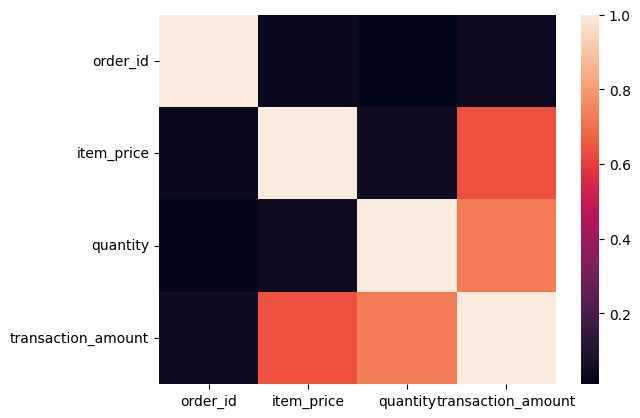

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv( "C:\Data science\DATA SET\Balaji Fast Food Sales.csv")
#print(df.corr(),dtype=false)
corr=df.corr(numeric_only=True)
print(corr)
sns.heatmap(corr)
plt.show()

5 GROUPED BY MOST SELLING ITEM

In [15]:
import pandas as pd
df=pd.read_csv( "C:\Data science\DATA SET\Balaji Fast Food Sales.csv")
print(df.groupby('item_type').groups)

{'Beverages': [3, 4, 6, 19, 20, 21, 23, 25, 26, 27, 28, 30, 35, 40, 43, 44, 51, 59, 61, 63, 67, 69, 70, 73, 74, 76, 87, 90, 92, 94, 96, 98, 101, 102, 103, 108, 115, 120, 122, 123, 129, 136, 141, 149, 151, 154, 158, 160, 163, 166, 171, 172, 178, 180, 181, 182, 183, 184, 189, 190, 192, 199, 203, 206, 207, 209, 211, 213, 214, 216, 217, 219, 223, 226, 230, 240, 241, 246, 248, 249, 250, 252, 253, 259, 263, 267, 273, 275, 276, 297, 302, 305, 311, 312, 314, 319, 321, 323, 332, 333, ...], 'Fastfood': [0, 1, 2, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 22, 24, 29, 31, 32, 33, 34, 36, 37, 38, 39, 41, 42, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 60, 62, 64, 65, 66, 68, 71, 72, 75, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 89, 91, 93, 95, 97, 99, 100, 104, 105, 106, 107, 109, 110, 111, 112, 113, 114, 116, 117, 118, 119, 121, 124, 125, 126, 127, 128, 130, 131, 132, 133, 134, 135, 137, 138, 139, 140, 142, ...]}


6 GROUPED BY ITEM TYPE

In [ ]:

import pandas as pd
df=pd.read_csv( "C:\Data science\DATA SET\Balaji Fast Food Sales.csv")
grouped=df.groupby('item_type')
for item_type,groups in grouped:
    print(item_type)
    print(groups)


Beverages
     order_id        date        item_name  item_type  item_price  quantity  \
3           4  02-03-2023  Sugarcane juice  Beverages          25         6   
4           5  10-02-2022  Sugarcane juice  Beverages          25         8   
6           7  05-03-2022  Sugarcane juice  Beverages          25         9   
19         20   9/15/2022      Cold coffee  Beverages          40        10   
20         21  12/21/2022      Cold coffee  Beverages          40        15   
..        ...         ...              ...        ...         ...       ...   
981       982   3/30/2023  Sugarcane juice  Beverages          25        14   
982       983   3/17/2023      Cold coffee  Beverages          40        10   
985       986   4/30/2022  Sugarcane juice  Beverages          25        13   
988       989  10-11-2022      Cold coffee  Beverages          40        13   
994       995   6/18/2022  Sugarcane juice  Beverages          25         1   

     transaction_amount transaction_type 

7 BOX PLOT OF TRANSACTION AMOUNT BY ITEM PRICE

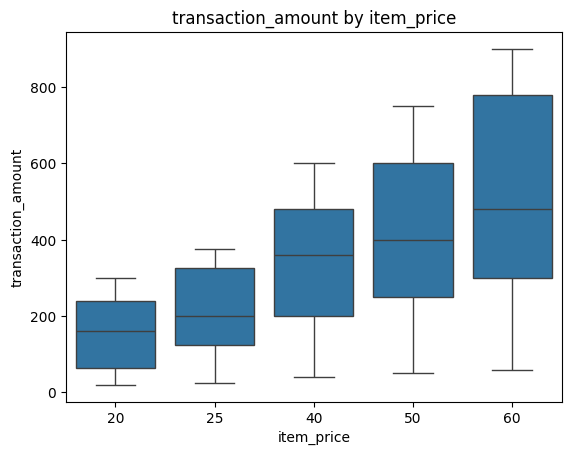

In [17]:
import pandas as pd
import matplotlib.pyplot as plt0
import seaborn as sns
df=pd.read_csv( "C:\Data science\DATA SET\Balaji Fast Food Sales.csv")
mean_item_type=df.groupby('item_price')['transaction_amount']
print(mean_item_type)
sns.boxplot(x='item_price',y='transaction_amount',data=df)
plt.title('transaction_amount by item_price')
plt.show()

8 max and min value of quantity and item price

In [ ]:

import pandas as pd
df=pd.read_csv( "C:\Data science\DATA SET\Balaji Fast Food Sales.csv")
df['quantity'].agg(['min'])
df['item_price'].agg(['max'])


max    60
Name: item_price, dtype: int64

9 FIND THE DATA WITH TIME OF SALE

In [ ]:

import pandas as pd
df=pd.read_csv("C:\Data science\DATA SET\Balaji Fast Food Sales.csv")
df={'date':['02-03-2023','03-30-2023','03-17-2023','10-02-2022','9-15-2022'],
      'time_of_sale':'PM',}
df=pd.DataFrame(df)
print(df)


         date time_of_sale
0  02-03-2023           PM
1  03-30-2023           PM
2  03-17-2023           PM
3  10-02-2022           PM
4   9-15-2022           PM


10 CHECK THE COUNT OF QUANTITY

In [ ]:

df['Quantity'].value_counts(normalize=True)

Quantity
6     0.25
8     0.25
9     0.25
10    0.25
Name: proportion, dtype: float64

11 max and min value of transaction amount

In [9]:
import pandas as pd
df=pd.read_csv( "C:\Data science\DATA SET\Balaji Fast Food Sales.csv")
df['transaction_amount'].agg(['min'])
df['item_price'].agg(['max'])


max    60
Name: item_price, dtype: int64

12 count value of item price

In [ ]:

df=pd.read_csv( "C:\Data science\DATA SET\Balaji Fast Food Sales.csv")
df['item_price'].value_counts(normalize=True)


item_price
20    0.418
40    0.161
25    0.153
50    0.139
60    0.129
Name: proportion, dtype: float64

13 check count value of order id

In [ ]:
df['order_id'].value_counts(normalize=True)

order_id
1000    0.001
1       0.001
2       0.001
3       0.001
4       0.001
        ...  
13      0.001
12      0.001
11      0.001
10      0.001
9       0.001
Name: proportion, Length: 1000, dtype: float64

14 count of transaction amount

In [ ]:

df['transaction_amount'].value_counts(normalize=True)

transaction_amount
300    0.057
200    0.056
60     0.047
40     0.046
120    0.044
100    0.044
240    0.042
280    0.041
260    0.034
350    0.033
160    0.032
80     0.031
20     0.031
400    0.028
600    0.028
180    0.027
220    0.022
140    0.022
250    0.019
420    0.017
360    0.017
650    0.017
480    0.017
25     0.016
900    0.014
500    0.014
175    0.014
520    0.014
150    0.013
320    0.012
325    0.012
750    0.011
50     0.011
450    0.010
440    0.010
125    0.010
840    0.010
225    0.009
780    0.009
560    0.009
375    0.009
660    0.007
540    0.007
75     0.007
720    0.007
550    0.005
275    0.005
700    0.003
Name: proportion, dtype: float64

15 find the minimum item price

In [ ]:
df=pd.read_csv( "C:\Data science\DATA SET\Balaji Fast Food Sales.csv")
df['item_price'].agg(['min'])

min    20
Name: item_price, dtype: int64

ANALYSIS SUMMARY:

>Our analysis of food sales data reveals key trends and insights that can inform business decisions.The data covers sales transactions from[03/05/2022]to[30/03/2023].

KEY FINDINGS:

>Total ID of customers        :999
>Most selling type            :Beverages
>minimum food quantity        :1.000000
>maximum price of food        :60/-
>Highest transaction amount   :999/-
>Lowest quantity of item      :vadapav

LIMITATIONS:

>Data Quality  :  The accuracy of the analysis depends on the quality of the sales data.